<a href="https://colab.research.google.com/github/DrUkachi/online_retail_project/blob/main/online_retail_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
CLEANED_DATASET_PATH = "/content/drive/MyDrive/Colab_Notebooks/online_retail/further_cleaned_retail_data.csv"

In [3]:
cleaned_data = pd.read_csv(CLEANED_DATASET_PATH, index_col="Date")

In [4]:
cleaned_data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
cleaned_data.isnull().sum()

Invoice            0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
Price              0
Country            0
Null_CustomerID    0
New_ID             0
Amount_Spent       0
InvoiceMonth       0
Day_of_week        0
dtype: int64

To get the top 20 products by quantity and Amount Spent

In [ ]:
sns.set_style('whitegrid')
Top20Quantity = cleaned_data.groupby("Description")["Quantity"].agg('sum').sort_values(ascending=False).head(20)

In [ ]:
sns.set_style('whitegrid')
Top20Amount = cleaned_data.groupby("Description")["Amount_Spent"].agg('sum').sort_values(ascending=False)[0:20]

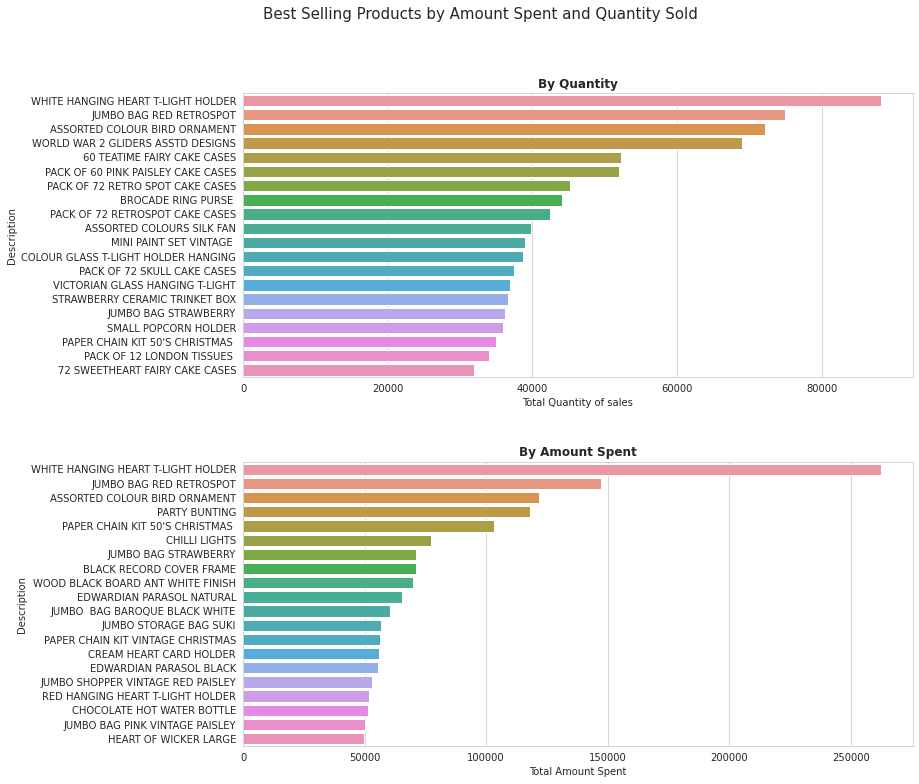

In [ ]:
#creating the subplot
fig,axs = plt.subplots(nrows=2, ncols=1, figsize = (12,12))
plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Best Selling Products by Amount Spent and Quantity Sold', fontsize=15, x = 0.4, y = 0.98)
sns.barplot(x=Top20Quantity.values, y=Top20Quantity.index, ax= axs[0]).set(xlabel='Total Quantity of sales')
axs[0].set_title('By Quantity', size=12, fontweight = 'bold')

sns.barplot(x=Top20Amount.values, y=Top20Amount.index, ax= axs[1]).set(xlabel='Total Amount Spent')
axs[1].set_title('By Amount Spent', size=12, fontweight = 'bold')
plt.show()

The other thing to also take a look at is to check which products were mostly returned by our customers and from whom were these items returned from. Which countries had the most returned transactions.

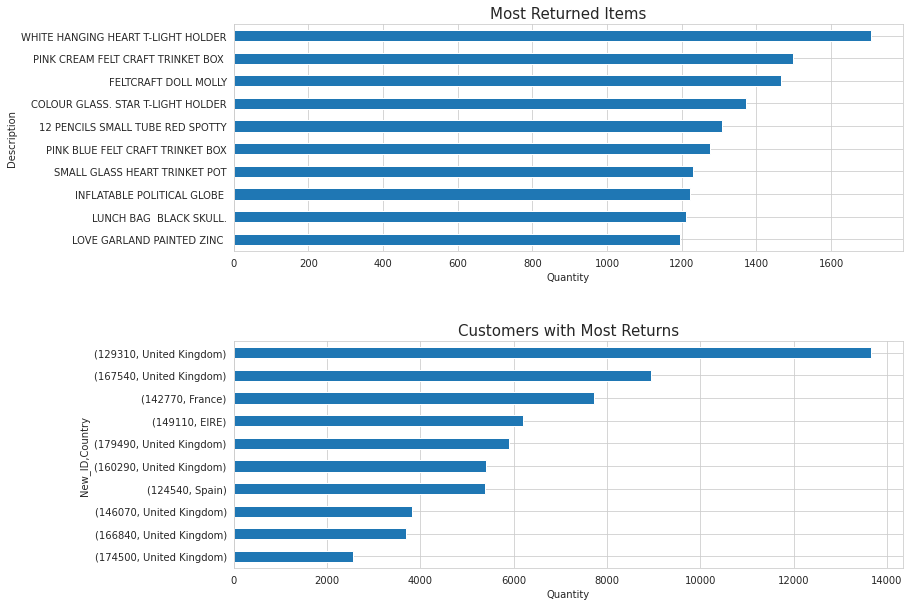

In [ ]:
returned_items = cleaned_data[cleaned_data["Quantity"]<0].groupby("Description")["Quantity"].sum()
returned_items = returned_items.abs().sort_values(ascending=False)[0:10]

return_customers = cleaned_data[cleaned_data["Quantity"]<0].groupby(["New_ID", "Country"])["Quantity"].sum()
return_customers = return_customers.abs().sort_values(ascending=False)[0:10]

# Generating the subplot

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
returned_items.sort_values().plot(kind='barh', ax=ax1).set_title('Most Returned Items', fontsize=15)
return_customers.sort_values().plot(kind='barh', ax=ax2).set_title('Customers with Most Returns', fontsize=15)
ax1.set(xlabel='Quantity')
ax2.set(xlabel='Quantity')
plt.subplots_adjust(hspace=0.4)
plt.show()

An important correlation to consider is the joint plot of the quantity and price. It is expected that as the price of item decreases the more that item is likely to be bought.

In [ ]:
corr = sns.jointplot(x="Quantity", y="Price",
                     data=cleaned_data[cleaned_data.Amount_Spent>0],
                     height=7)
corr.fig.subtitle("A Comparison of Unit Price and Quantity",
                  fontsize=15, y=1.1)

In [ ]:
cleaned_data.index = cleaned_data.InvoiceDate

In [ ]:
# Generate the aggregated weekly sales
dated_retail_data = cleaned_data.copy()
dated_retail_data["Date"] = pd.to_datetime(cleaned_data["InvoiceDate"]) - pd.to_timedelta(7, unit="d")
weekly_retail_data = dated_retail_data.groupby(["StockCode", pd.Grouper(key="Date", freq="W-MON")])["Quantity"].sum().reset_index().sort_values('Date')

In [ ]:
dated_retail_data["Date"] = pd.to_datetime(cleaned_data["InvoiceDate"]) - pd.to_timedelta(7, unit="d")

In [ ]:
dated_retail_data.index = dated_retail_data["Date"]

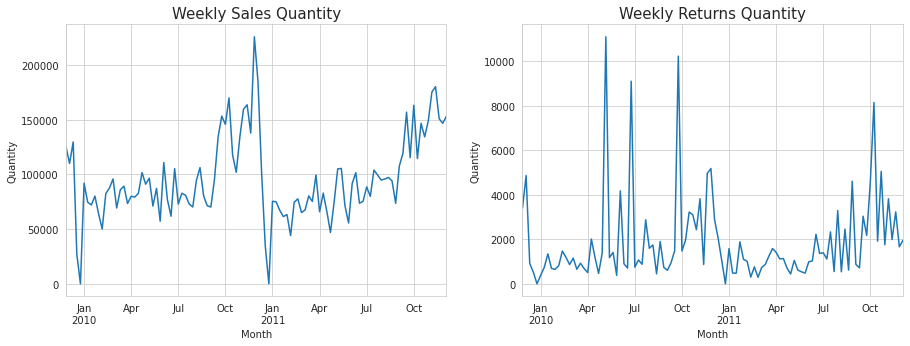

In [ ]:
#resampling to get the weekly sales and returns
WeeklySale = dated_retail_data[dated_retail_data['Quantity']>0].Quantity.resample('W').sum()
WeeklyRet = dated_retail_data[dated_retail_data['Quantity']<0].Quantity.resample('W').sum().abs()
#creating the subplot
fig,[ax1, ax2] = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
WeeklySale.plot(ax=ax1).set(xlabel="Month", ylabel="Quantity")
ax1.set_title("Weekly Sales Quantity", fontsize = 15)
WeeklyRet.plot(ax=ax2).set(xlabel="Month", ylabel="Quantity")
ax2.set_title("Weekly Returns Quantity", fontsize = 15)
plt.show()

The weekly aggregated sales show that there is spike in sales around January. This might infer that the time-series is somewhat seasonal. However, we will not be quick to jump into conclusions just yet.

The return do not show much information as it is almost time invariant.

In the next plot, let us analyse certain information that can be provided by the other countries apart from the United Kingdom - as this is already dominating the dataset.

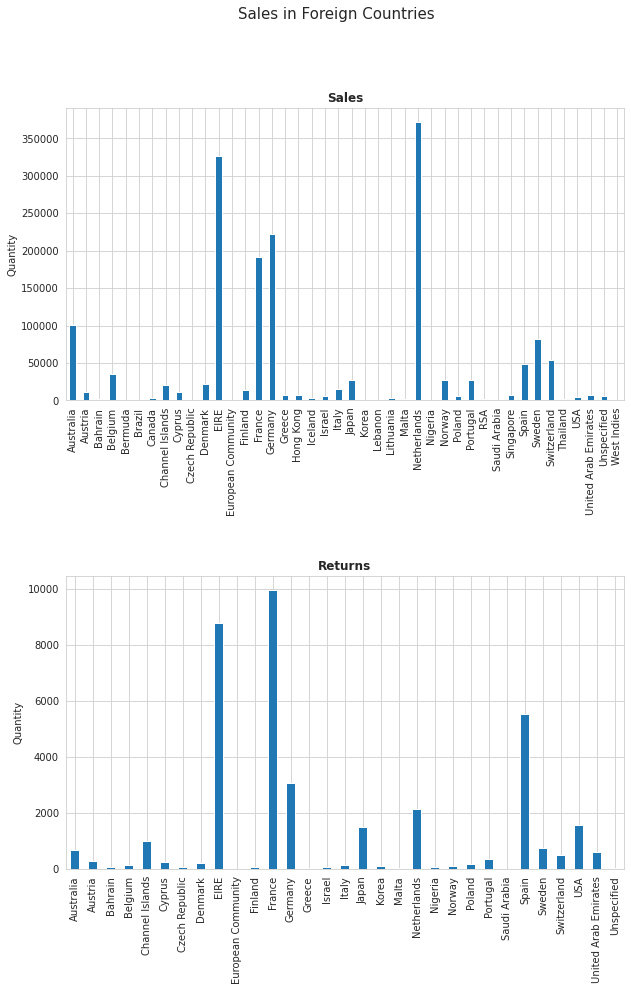

In [ ]:
# grouping data by the countries(except UK)
ByCountrySale = cleaned_data[(cleaned_data.Country != 'United Kingdom') & (cleaned_data.Quantity > 0)].groupby('Country')['Quantity'].sum()
ByCountryRet = cleaned_data[(cleaned_data.Country != 'United Kingdom') & (cleaned_data.Quantity < 0)].groupby('Country')['Quantity'].sum().abs()
#creating the subplot
fig, [ax1,ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10,14))
ByCountrySale.plot(kind='bar', ax=ax1).set(ylabel = 'Quantity',xlabel='')
ax1.set_title('Sales', size=12, fontweight = 'bold')
ByCountryRet.plot(kind='bar', ax=ax2).set(ylabel = 'Quantity',xlabel='')
ax2.set_title('Returns', size=12, fontweight = 'bold')
plt.suptitle('Sales in Foreign Countries', fontsize = 15)
plt.subplots_adjust(hspace = 0.6)
plt.show()

Is it possible that the day of the week could affect how much sales are made? 

What insight does the data give into this? 

With a pie-chart we can visualise the distribution of sales as it concerns the day of the week.

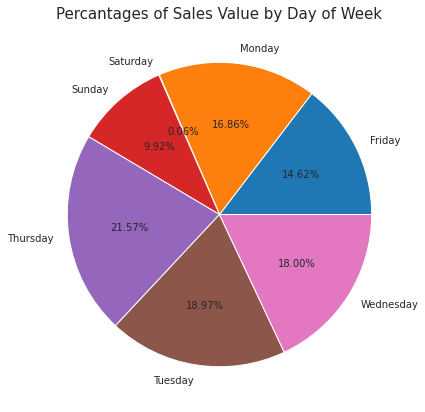

In [ ]:
#creating the pie chart
cleaned_data.groupby('Day_of_week')['Amount_Spent'].sum().plot(kind = 'pie', autopct = '%.2f%%', figsize=(7,7)).set(ylabel='')
plt.title('Percantages of Sales Value by Day of Week', fontsize = 15)
plt.show()

From the above chart most of the items were sold on a Thursday. Does this information provide any information about Thursdays in the year 2010 and 2011?

Furthermore, the distribution of the price and quantity of items sold is shown 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



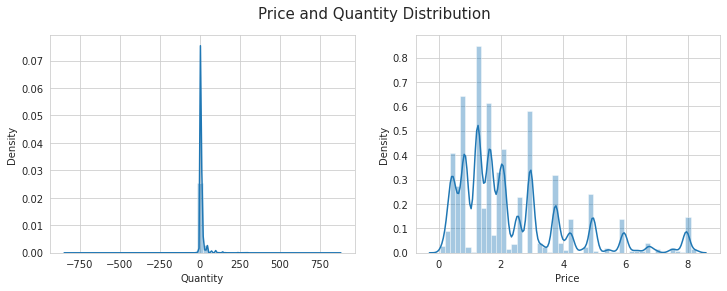

In [ ]:
#creating distribution plots
fig , [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
with sns.axes_style('dark'):
    sns.distplot(cleaned_data['Quantity'], ax=ax1)
    sns.distplot(cleaned_data['Price'], ax=ax2)
fig.suptitle('Price and Quantity Distribution', fontsize = 15)
plt.show()

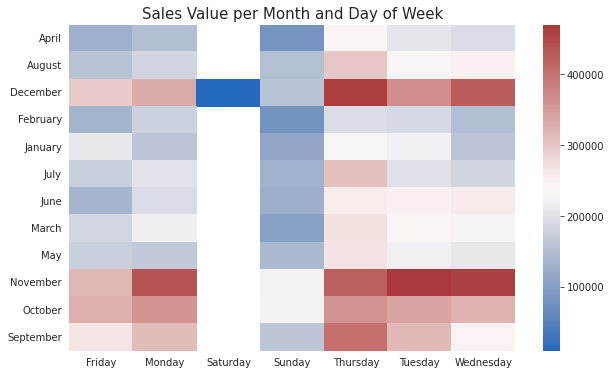

In [ ]:
HM_Data = cleaned_data.pivot_table(index = 'InvoiceMonth',columns = 'Day_of_week', 
                                   values = 'Amount_Spent', aggfunc='sum')
plt.figure(figsize = (10,6))
sns.heatmap(HM_Data, cmap = 'vlag').set(xlabel='', ylabel='')
plt.title('Sales Value per Month and Day of Week', fontsize = 15)
plt.show()

The above plot shows how sales were distributed among different months and days of the week.

## Relationship between item and weekly sales

Is there a relationship between the item bought and the period with which it was bought?

This question can be answered using a time-series plot



In [8]:
# Generating the top 10 sold products

top_10 = cleaned_data['Quantity'].groupby(cleaned_data['Description']).agg(
    'sum').sort_values(ascending = False).head(10)

top_10_list = list(top_10.index)

In [6]:
# Generate the aggregated weekly sales
dated_retail_data = cleaned_data.copy()
dated_retail_data["Date"] = pd.to_datetime(cleaned_data["InvoiceDate"]) - pd.to_timedelta(7, unit="d")
weekly_retail_data = dated_retail_data.groupby(["Description", pd.Grouper(key="Date", freq="W-MON")])["Quantity"].sum().reset_index().sort_values('Date')

In [ ]:
#creating the subplot
fig,[ax1, ax2] = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
WeeklySale.plot(ax=ax1).set(xlabel="Month", ylabel="Quantity")
ax1.set_title("Weekly Sales Quantity", fontsize = 15)
WeeklyRet.plot(ax=ax2).set(xlabel="Month", ylabel="Quantity")
ax2.set_title("Weekly Returns Quantity", fontsize = 15)
plt.show()

In [15]:
def plot_product_weekly_sales(description):
  plt.figure(figsize = (10,6))
  sns.lineplot(x=weekly_retail_data.loc[weekly_retail_data["Description"] == description]["Date"],
               y=weekly_retail_data.loc[weekly_retail_data["Description"] == description]["Quantity"]).set(title=f"Weekly Sales for {description}")
  plt.show()
  

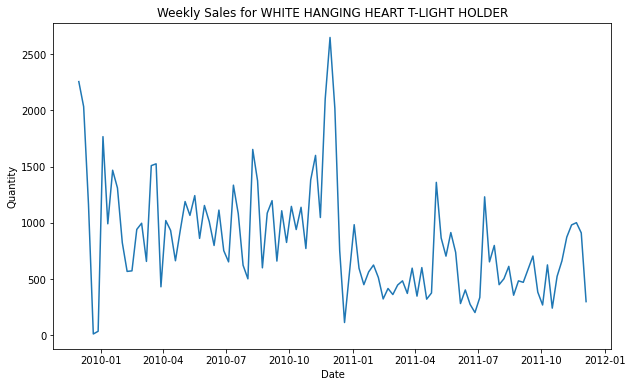

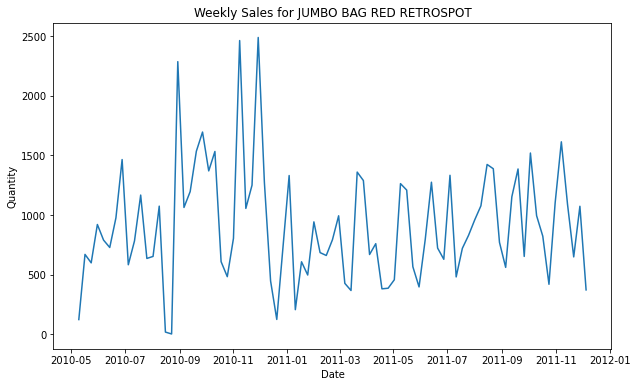

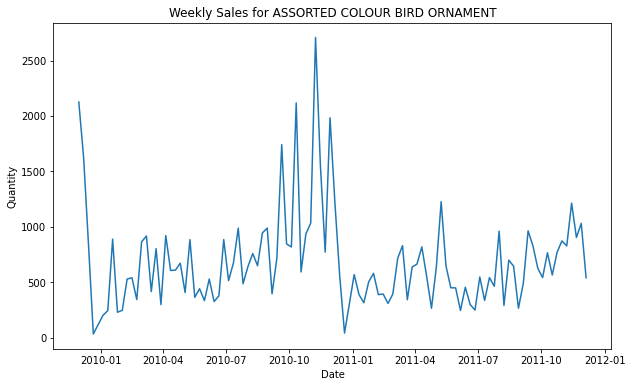

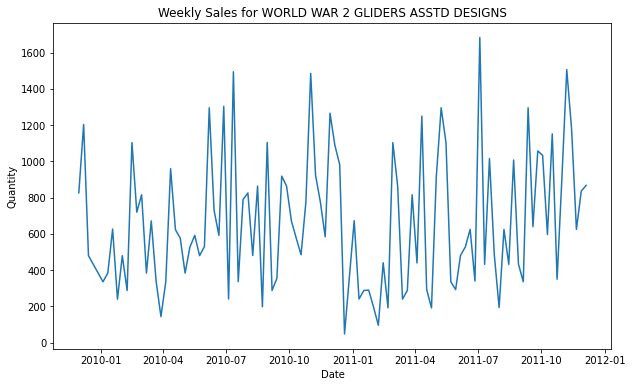

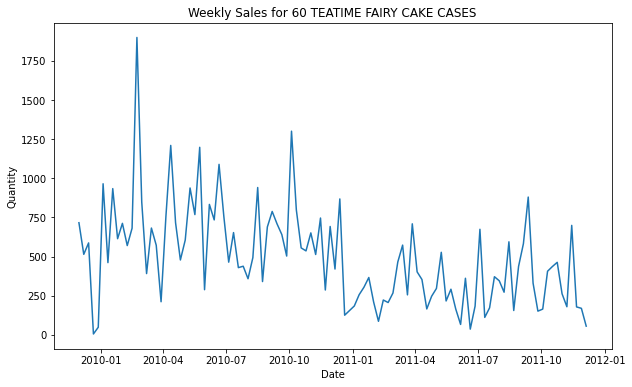

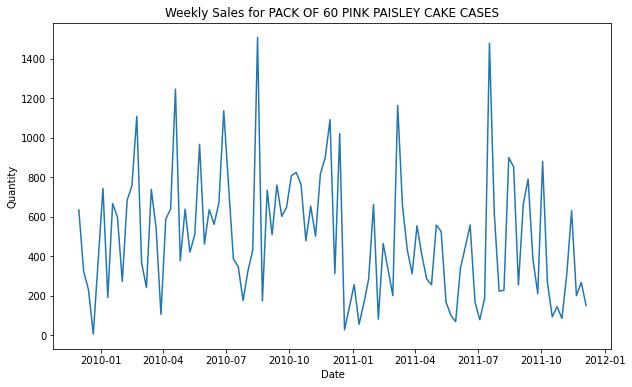

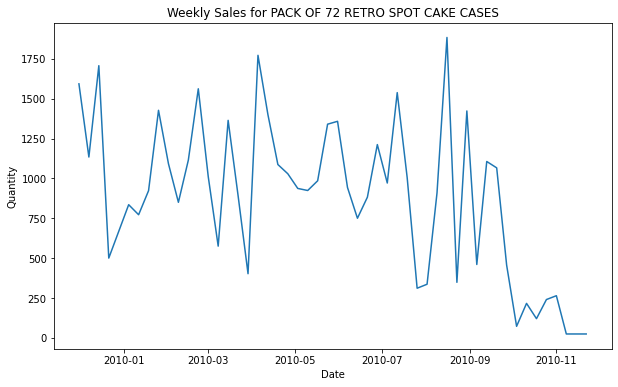

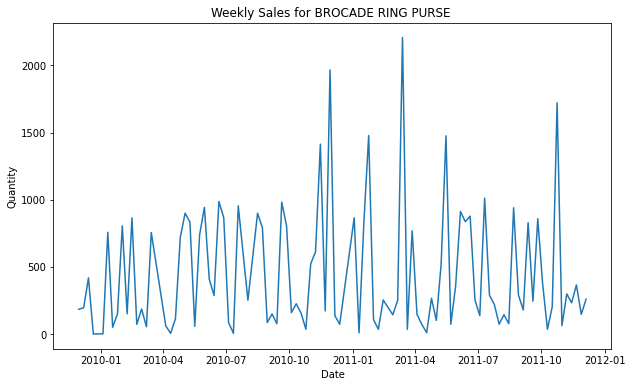

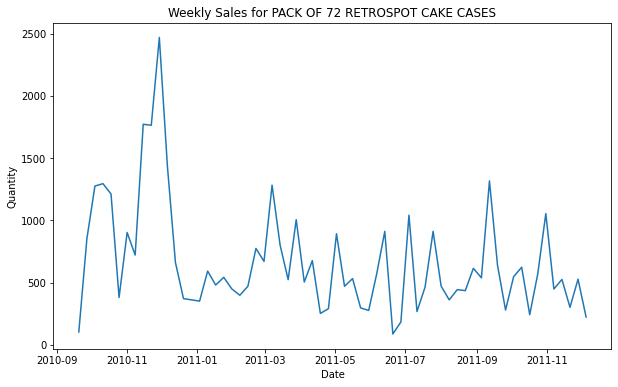

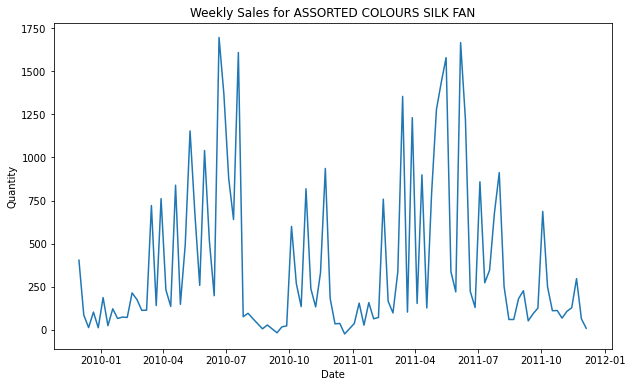

In [16]:
for item in top_10_list:
  plot_product_weekly_sales(item)

In [ ]:
def plot_series(description):
  fig = go.Figure([go.Scatter(x=weekly_retail_data.loc[weekly_retail_data["Description"] == description]["Date"], 
                            y=weekly_retail_data.loc[weekly_retail_data["Description"] == description]["Quantity"])])
  fig.update_layout(title_text=f"Graph for {description}")
  return fig.show()

In [ ]:
for item in top_10_list:
  plot_series(item)

From the above observations, it can be seen that the top 3 products were seasonal in nature.

Most of the sales occurred during Holiday seasons or in preparation for holiday seasons - (November)

## Relationship between the country and the total sales

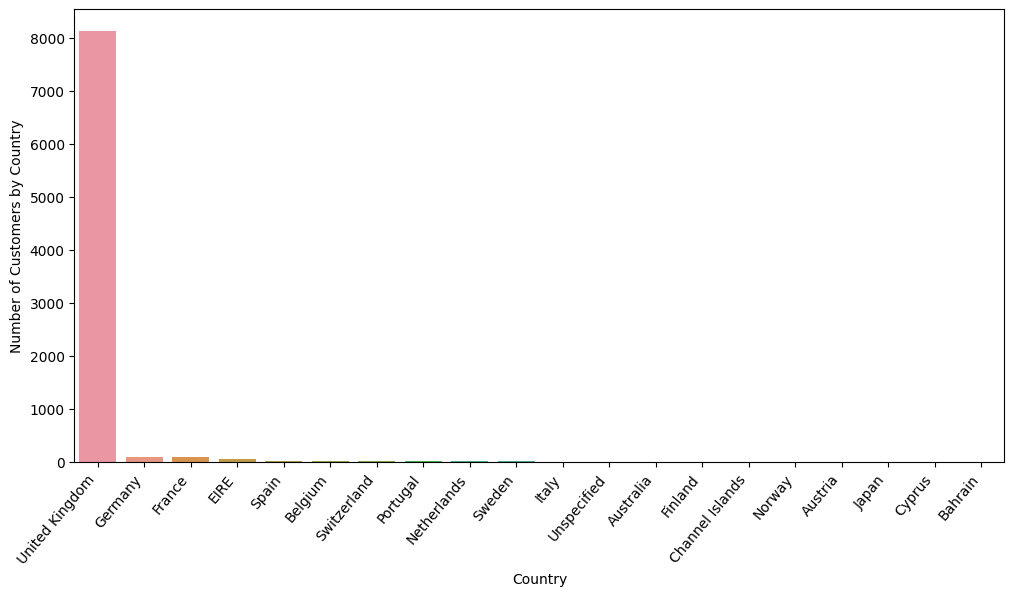

In [19]:
country_df = pd.DataFrame(cleaned_data.groupby('Country')['New_ID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.head(20).index, y=country_df.head(20)['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

In [18]:
# Generate the aggregated weekly sales
dated_retail_data = cleaned_data.copy()
dated_retail_data["Date"] = pd.to_datetime(cleaned_data["InvoiceDate"]) - pd.to_timedelta(7, unit="d")
weekly_retail_data_country = dated_retail_data.groupby(["Country", pd.Grouper(key="Date", freq="W-MON")])["Quantity"].sum().reset_index().sort_values('Date')

In [ ]:
# Plot the data for the First five countries to observe their pattern of purchase

list_countries = list(country_df.index[0:6])

def plot_series_country(country):
  fig = go.Figure([go.Scatter(x=weekly_retail_data_country.loc[weekly_retail_data_country["Country"] == country]["Date"], 
                            y=weekly_retail_data_country.loc[weekly_retail_data_country["Country"] == country]["Quantity"])])
  fig.update_layout(title_text=f"Aggregated weekly sales for {country}")
  return fig.show()

for item in list_countries:
  plot_series_country(item)

In [25]:
def plot_country_weekly_sales(country):
  plt.figure(figsize = (10,6))
  sns.lineplot(x=weekly_retail_data_country.loc[weekly_retail_data_country["Country"] == country]["Date"],
               y=weekly_retail_data_country.loc[weekly_retail_data_country["Country"] == country]["Quantity"]).set(title=f"Weekly Sales for {country}")
  plt.show()

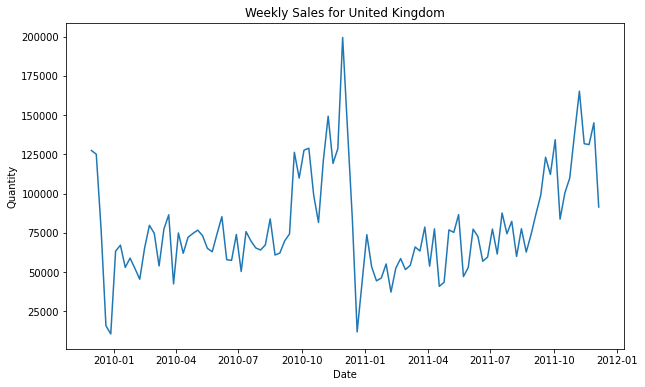

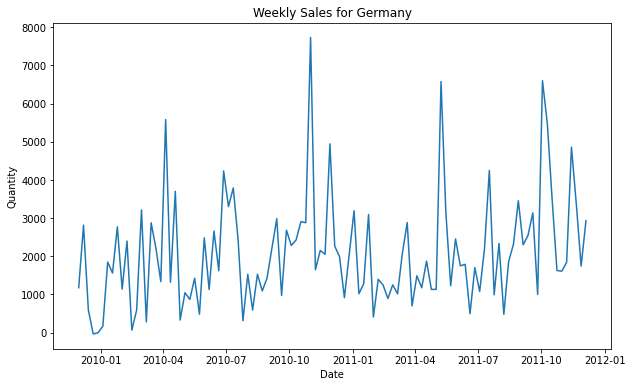

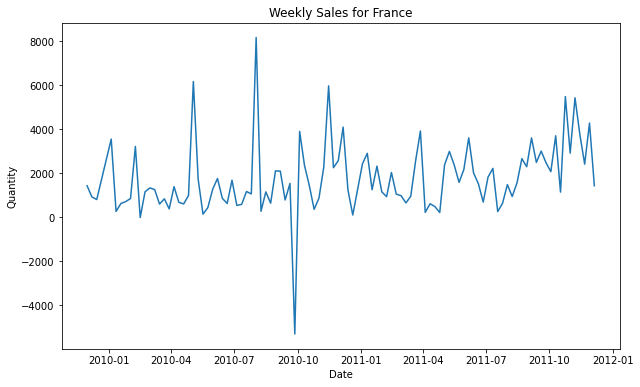

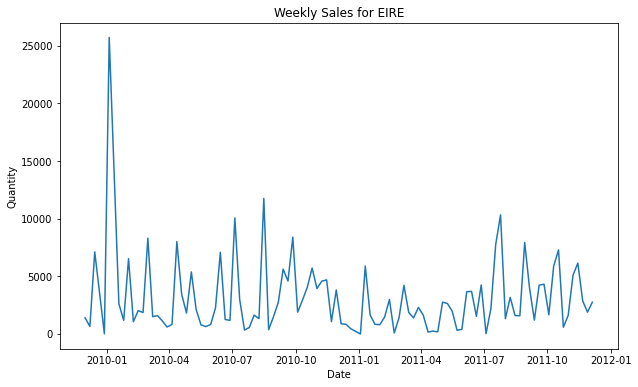

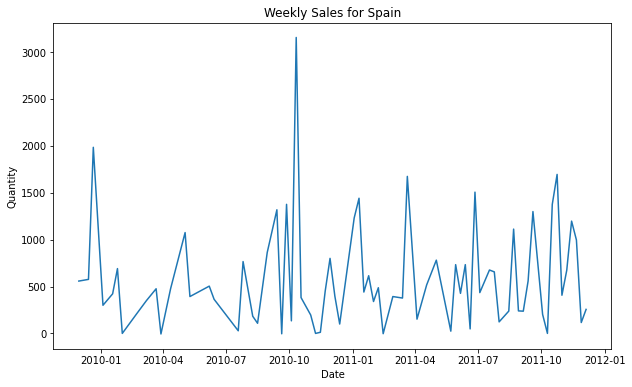

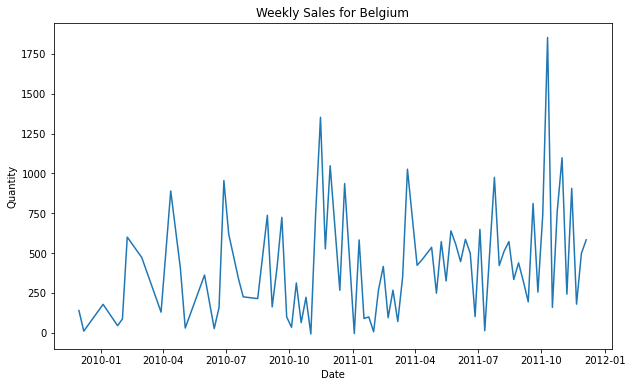

In [26]:
list_countries = list(country_df.index[0:6])

for country in list_countries:
  plot_country_weekly_sales(country)

## Observations from the Time Series Analysis on the Countries

Seasonal - Before or during Public Holidays, it can be observed that there is a spike aggregated weekly sales, and in some case this corresponds to the item being bought in preparation for the holidays.

A good example: The UK - In the week of Nov. 29, there must have been - Preparation for Christmas and St. Andrews’ Day. It is also not suprising that the White Hanging Light T-Holder, was the most bought item for that week.

Another similar occurence also happend in Spain. It was observed that there was a spike in the sales just befoe the week of a National Holiday - (National Day of Spain - Oct 12 2010)

Another example - In EIRE, the week of the New Year’s celebration experienced the most sales.- Jan 4 (A week before the new year date)

German Unity day - Oct 3, also experience a spike in sales the week before this date.
